In [1]:
import matplotlib.pyplot as plt
import requests
# import asyncio
# import nest_asyncio
import copy
import numpy as np
import os
import time
import random
import concurrent.futures
# nest_asyncio.apply()  # Enable nested asyncio support

In [2]:
docker_url = "http://localhost:5000"

### A-1. Default configuration with 6 servers, 4 shards, 3 replicas

In [3]:
payload = {
    "N": 6,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2"],
        "Server1": ["sh3", "sh4"],
        "Server2": ["sh1", "sh3"],
        "Server3": ["sh4", "sh2"],
        "Server4": ["sh1", "sh4"],
        "Server5": ["sh3", "sh2"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

{'message': 'Configured Database', 'status': 'success'}


In [3]:
num_requests = 10000

write_times= []
max_stud_id = 16383

def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    write_tasks=[executor.submit(make_write_request) for _ in range(num_requests)]
    concurrent.futures.wait(write_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


Total time taken: 308.2165672779083 secs


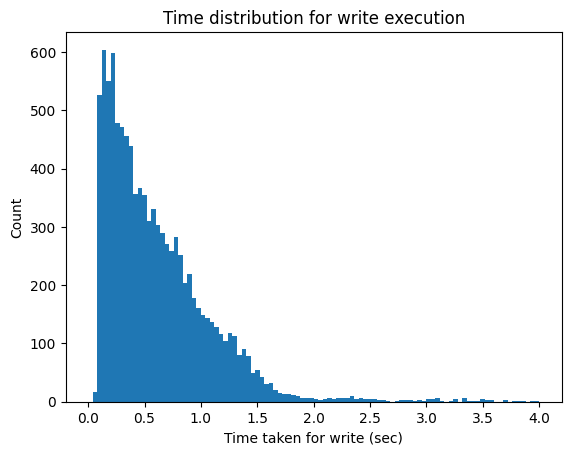

In [4]:
plt.hist(write_times, 100, (0,4))
plt.xlabel("Time taken for write (sec)")
plt.ylabel("Count")
plt.title("Time distribution for write execution")
plt.show()

In [5]:

num_requests = 10000

read_times = []
max_stud_id = 16383


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    read_tasks=[executor.submit(make_read_request) for _ in range(num_requests)]
    concurrent.futures.wait(read_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


Total time taken: 128.61532855033875 secs


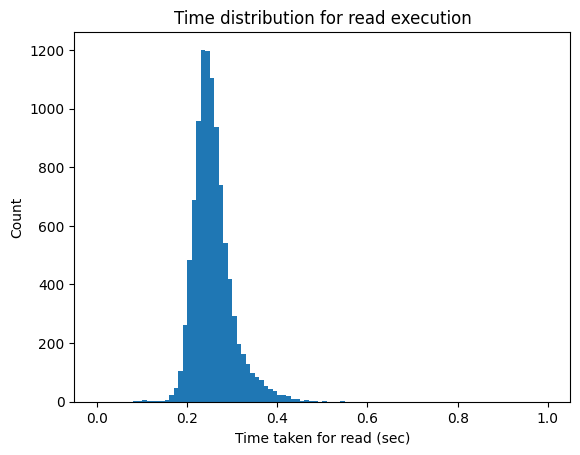

In [6]:
plt.hist(read_times, 100, (0,1))
plt.xlabel("Time taken for read (sec)")
plt.ylabel("Count")
plt.title("Time distribution for read execution")
plt.show()

In [8]:
payload = {
    "n": 6,
    "servers": ["Server0", "Server1", "Server2", "Server3", "Server4", "Server5"],
}
res = requests.delete(f"{docker_url}/rm", json=payload)

### A-2. 6 servers, 4 shards, 6 replicas

In [8]:
payload = {
    "N": 6,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2", "sh3", "sh4"],
        "Server1": ["sh1", "sh2", "sh3", "sh4"],
        "Server2": ["sh1", "sh2", "sh3", "sh4"],
        "Server3": ["sh1", "sh2", "sh3", "sh4"],
        "Server4": ["sh1", "sh2", "sh3", "sh4"],
        "Server5": ["sh1", "sh2", "sh3", "sh4"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

{'message': 'Configured Database', 'status': 'success'}


In [9]:
num_requests = 10000

write_times= []
max_stud_id = 16383

def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    write_tasks=[executor.submit(make_write_request) for _ in range(num_requests)]
    concurrent.futures.wait(write_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


Remaining 9999
Remaining 8999
Remaining 7999
Remaining 6999
Remaining 5999
Remaining 4999
Remaining 3999
Remaining 2999
Remaining 1999
Remaining 999


In [ ]:
plt.hist(write_times, 100, (0,4))
plt.xlabel("Time taken for write (sec)")
plt.ylabel("Count")
plt.title("Time distribution for write execution")
plt.show()

In [ ]:
num_requests = 10000

read_times = []
max_stud_id = 16383


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    read_tasks=[executor.submit(make_read_request) for _ in range(num_requests)]
    concurrent.futures.wait(read_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


In [ ]:
plt.hist(read_times, 100, (0,1))
plt.xlabel("Time taken for read (sec)")
plt.ylabel("Count")
plt.title("Time distribution for read execution")
plt.show()

### A-3. 10 servers, 6 shards, 8 replicas

In [28]:
payload = {
    "N": 10,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
        {"Stud_id_low": 16384, "Shard_id": "sh5", "Shard_size": 4096},
        {"Stud_id_low": 20480, "Shard_id": "sh6", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2", "sh4", "sh6"],
        "Server1": ["sh1","sh2", "sh3", "sh4", "sh5"],
        "Server2": ["sh1","sh2", "sh3", "sh5", "sh6"],
        "Server3": ["sh4", "sh2","sh3", "sh5", "sh6"],
        "Server4": ["sh1", "sh4", "sh5","sh6"],
        "Server5": ["sh3", "sh2", "sh5","sh6"],
        "Server6": ["sh1", "sh3", "sh4","sh5", "sh6"],
        "Server7": ["sh1","sh3", "sh4","sh2", "sh5"],
        "Server8": ["sh1","sh2", "sh3", "sh4", "sh6"],
        "Server9": ["sh1", "sh2","sh3","sh4", "sh5","sh6"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

{'message': 'Configured Database', 'status': 'success'}


In [12]:
num_requests = 10000

write_times= []
max_stud_id = 24575

def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    write_tasks=[executor.submit(make_write_request) for _ in range(num_requests)]
    concurrent.futures.wait(write_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


In [ ]:
plt.hist(write_times, 100, (0,4))
plt.xlabel("Time taken for write (sec)")
plt.ylabel("Count")
plt.title("Time distribution for write execution")
plt.show()

In [ ]:
num_requests = 10000

read_times = []
max_stud_id = 24575


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")

total_start_time=time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    read_tasks=[executor.submit(make_read_request) for _ in range(num_requests)]
    concurrent.futures.wait(read_tasks)

print(f"Total time taken: {time.time() - total_start_time} secs")


In [ ]:
plt.hist(read_times, 100, (0,1))
plt.xlabel("Time taken for read (sec)")
plt.ylabel("Count")
plt.title("Time distribution for read execution")
plt.show()